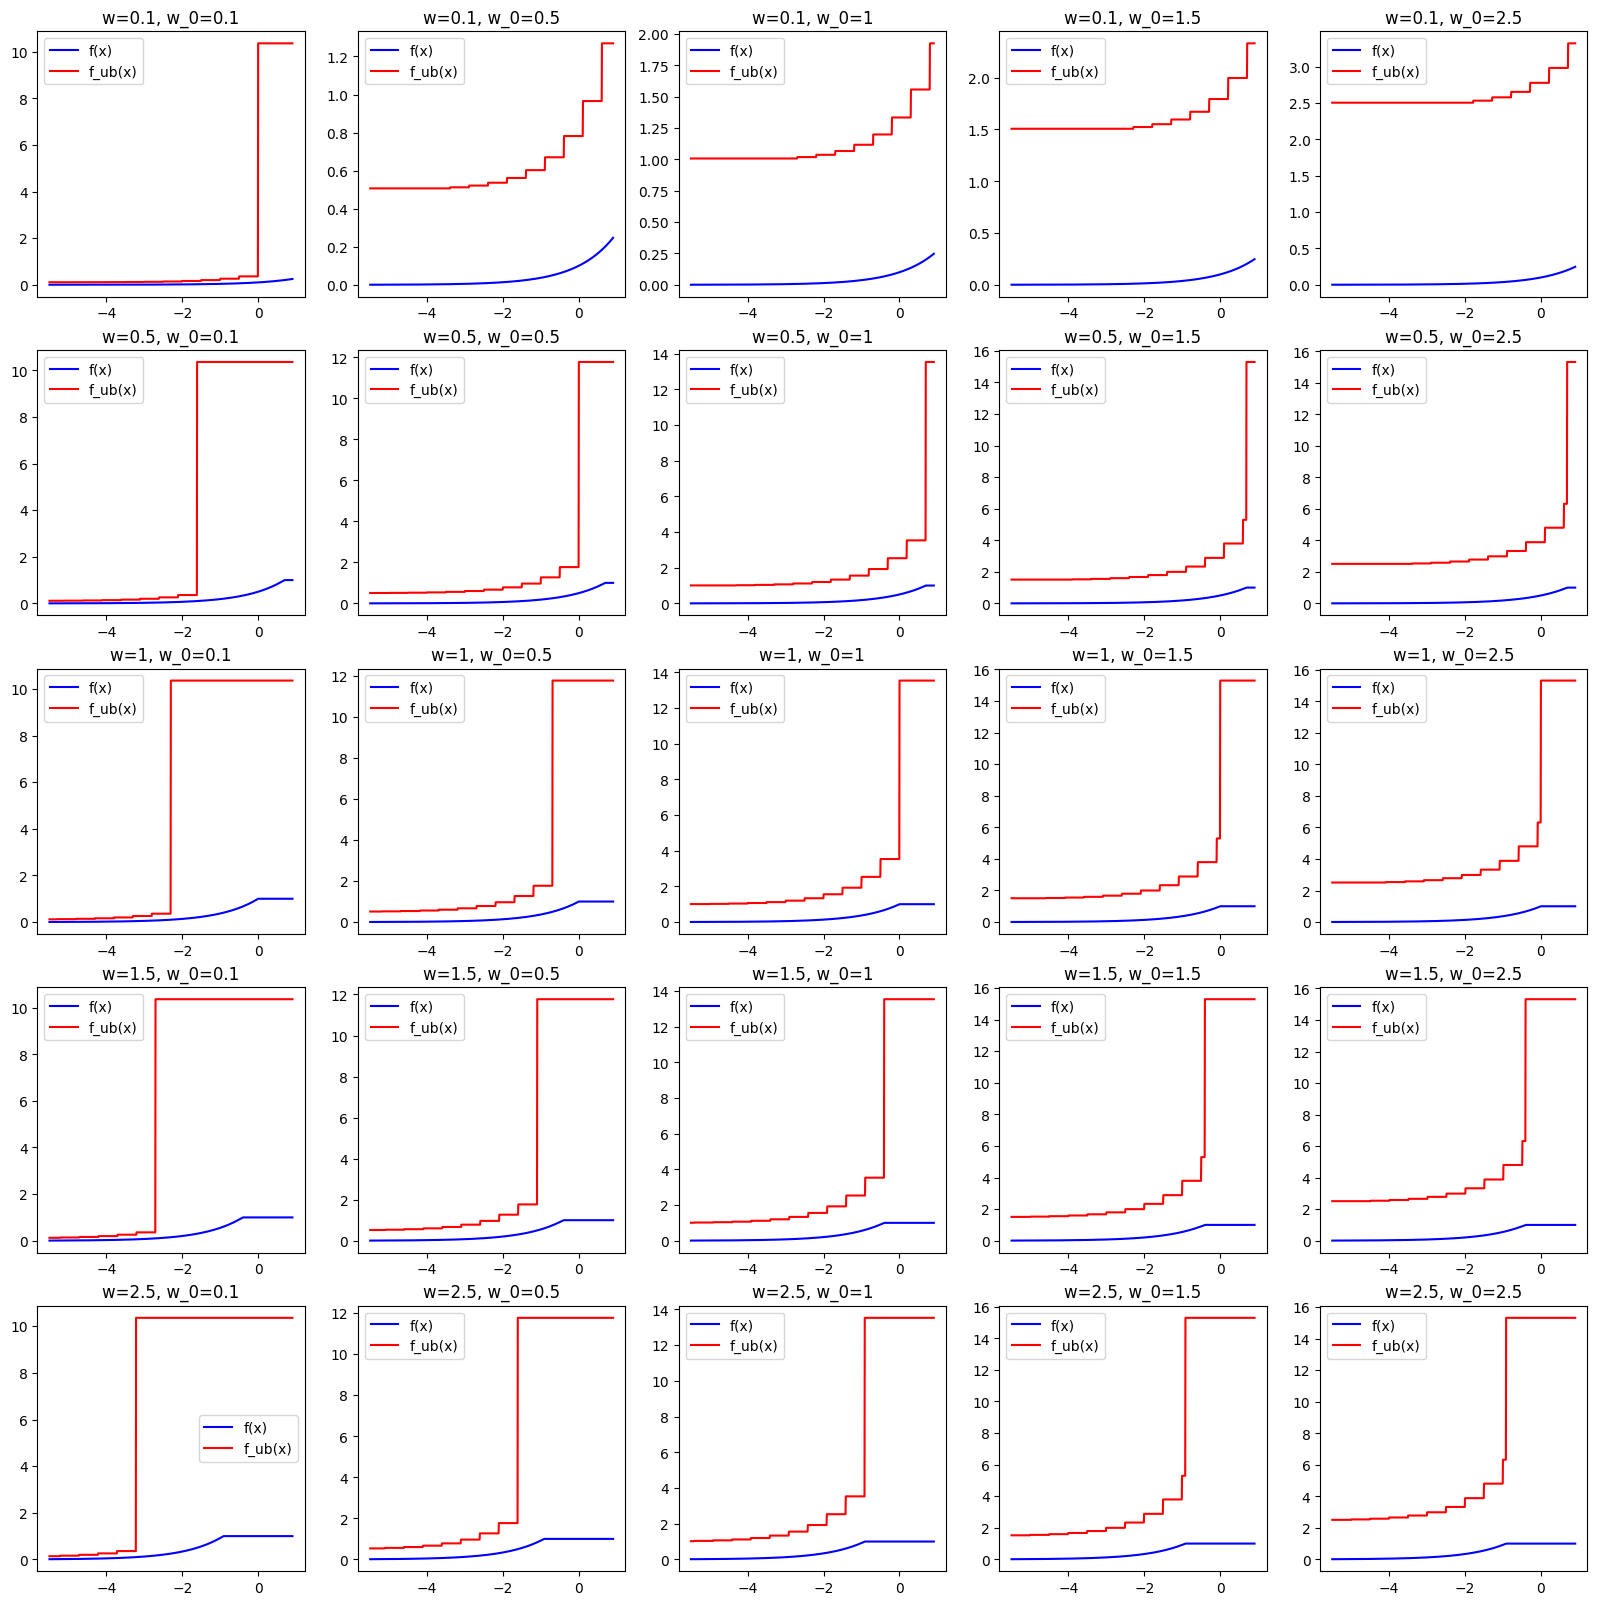

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# parameters:
w_0 = 0.5
w = 1.5

x_0 = -5
m = 10 # number of mesh points
n = 1000 # number of drawing points
# np.max(0.5, log(w)+0.5, log(w_0)+0.5)
maxi = np.max([0.5, np.log(w)+0.5, np.log(w_0)+0.5])

# linspace between x_0-0.5 and max
x = np.linspace(x_0-0.5, max, n)

# function:
f = lambda x: np.min([1, w*np.exp(x)])

# upper bound
def f_ub(x, w_0, w, x_0, m):
    y = w_0 + np.exp(x_0)
    # l_star minimum integer fow which
    # log(w_0) + (l_star+1)x_0/m < 0 
    l_star = int(np.ceil(-np.log(w_0)/x_0*m-1))
    # for values from the max between 0 and m-1
    for l in range(np.max([0, l_star]), m):
        if np.log(w) + x >= np.log(w_0) + (l+1)*x_0/m:
            y += w_0 * np.exp((l)*x_0/m)
        if np.log(w) + x >= np.min([0, np.log(w_0)]):
            y += 1
    return y

w_list = [0.1, 0.5, 1, 1.5, 2.5]
w_0_list = [0.1, 0.5, 1, 1.5, 2.5]
x_0 = -5
m = 10
n = 1000
maxi = np.max([0.5, np.log(w)+0.5, np.log(w_0)+0.5])
x = np.linspace(x_0-0.5, max, n)

# for each combination create a subplot, plot f and f_ub in the same plot, but with different colors
fig, axs = plt.subplots(5, 5, figsize=(20, 20))
for i, w in enumerate(w_list):
    for j, w_0 in enumerate(w_0_list):
        y = np.array([f(x) for x in x])
        y_ub = np.array([f_ub(x, w_0, w, x_0, m) for x in x])
        axs[i, j].plot(x, y, label='f(x)', color='blue')
        axs[i, j].plot(x, y_ub, label='f_ub(x)', color='red')
        axs[i, j].set_title(f'w={w}, w_0={w_0}')
        axs[i, j].legend()
plt.show()

# now run them for a lot of combinations of w and w_0 and print if at any point in time f_ub is smaller than f
for w in np.linspace(0.1, 2.5, 100):
    for w_0 in np.linspace(0.1, 2.5, 100):
        y = np.array([f(x) for x in x])
        y_ub = np.array([f_ub(x, w_0, w, x_0, m) for x in x])
        if np.any(y_ub < y):
            print(f'w={w}, w_0={w_0} violates the upper bound')
            break
    else:
        continue
    break
